### 목표
- 버섯의 특징을 활용해 독버섯/식용버섯 분류
- tree 시각&과대적합 속성 제어
- 특성선택 해보기(중요하게 여겨진 특성 확인하기)

In [27]:
# 도구 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#### 데이터 불러오기

In [28]:
pd.set_option('display.max_columns',None)

In [29]:
data = pd.read_csv('data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [30]:
# 데이터 크기 
data.shape 

(8124, 23)

In [31]:
# 데이터 정보 확인
data.info() 
# 결측치 null : x
# 데이터 타입 : object 문자열(범주형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### 문제(특성)와 답(label)로 분리

In [32]:
data.columns

Index(['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [33]:
# label: 'poisonous'
X = data.loc[:,'cap-shape':]
y = data['poisonous']

In [34]:
print(X.shape) # 문제
print(y.shape) # 답

(8124, 22)
(8124,)


In [35]:
# 식용과 독버섯의 개수 확인
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

#### 전처리: 인코딩

In [36]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [37]:
# 원핫 인코딩 사용하여 수치화
# 분류 변수 사용: 값의 크고 작음의 의미가 없을 경우 
X_one_hot = pd.get_dummies(X)
X_one_hot # 문제 데이터 

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

추가설명)레이블인코딩  
:분류 변수 사용: 값의 크고 작음의 의미가 있을 경우 사용

In [38]:
# 서식지 컬럼 이용
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [39]:
# 딕셔너리 정의
dic = {'u':1,
      'g':3,
      'm':2,
      'd':4,
      'p':6,
      'w':5,
      'l':7}
X['habitat'].map(dic)

0       1
1       3
2       2
3       1
4       3
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [40]:
X['habitat']

0       u
1       g
2       m
3       u
4       g
       ..
8119    l
8120    l
8121    l
8122    l
8123    l
Name: habitat, Length: 8124, dtype: object

#### train, test 분리

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_one_hot,y,
                                                test_size = 0.3,
                                                random_state = 11)

In [42]:
print('훈련용 문제:' ,X_train.shape)
print('훈련용 정답:', y_train.shape)
print('테스트용 문제:', X_test.shape)
print('테스트용 답:',y_test.shape)

훈련용 문제: (5686, 117)
훈련용 정답: (5686,)
테스트용 문제: (2438, 117)
테스트용 답: (2438,)


#### 모델링

In [43]:
# 객체 생성
tree_model = DecisionTreeClassifier()

In [44]:
# 모델 학습
# fit(훈련용문제,훈련용답)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
# 예측
# predict(테스트문제)
pre = tree_model.predict(X_test)
# 평가
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre)) # 정확도를 측정하는 도구 
print(tree_model.score(X_test,y_test)) #정확도를 측정하는 도구 

0.9991796554552912
0.9991796554552912


In [46]:
# 어떤 데이터가 들어오더라도 모델의 성능이 일반적일까?? 좋을까?? 

- 교차검증
:일반화 성능 측정 방법 -> 모든 데이터에 대해 모델이 얼마나 잘 맞추는지 평가 , 한번 나누는 것보다 더 안정적인 통계적 평가 

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(tree_model,X_train,y_train,cv = 5).mean()

0.9996481970096746

### 시각화

In [49]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model,out_file = 'tree.dot',
               class_names = ['독','식'],
               feature_names = X_one_hot.columns,
               impurity = False,
               filled = True)

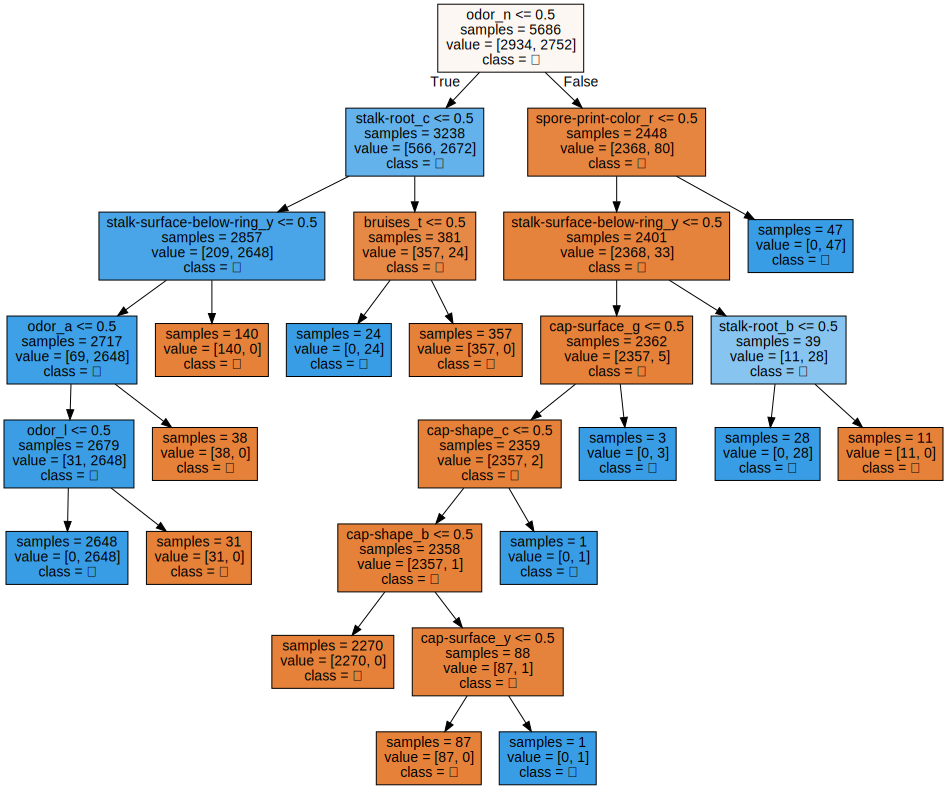

In [50]:
import graphviz
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [51]:
# 과대적합 제어한 모델도 시각화
tree_model2 = DecisionTreeClassifier(max_depth = 3)
tree_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
export_graphviz(tree_model2,out_file = 'tree.dot',
               class_names = ['독','식'],
               feature_names = X_one_hot.columns,
               impurity = False,
               filled = True)

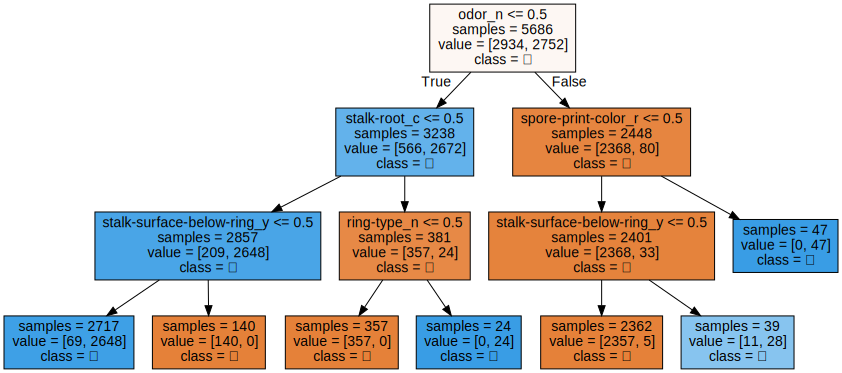

In [53]:
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 특성 중요도 확인

In [54]:
fi = tree_model.feature_importances_
fi

# 데이터 프레임화 
fi_df = pd.DataFrame(fi, index = X_train.columns)
fi_df.sort_values(by = 0, ascending = False)

,0
odor_n,0.616597
stalk-root_c,0.176660
stalk-surface-below-ring_y,0.102900
spore-print-color_r,0.031576
odor_a,0.025778
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-size_b,0.000000


### 추가) 7. Mushroom활용 DecisionTree분류 실습
max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes 중 하나를 선택하여 하이퍼파라미터를 지정 및 모델을 생성하고 모델의 학습 현황을 graphviz를 통해 확인하면서 하이퍼 파라미터 쓰임을 이해하자.

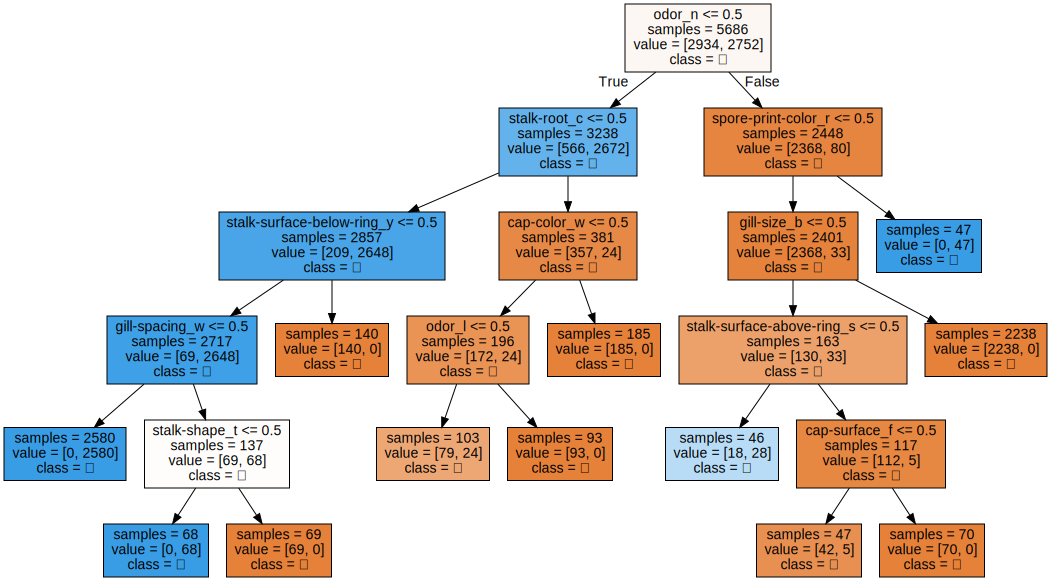

In [60]:
# 과대적합 제어한 모델 시각화
# min_samples_split 노드를 분할 하기 위한 최소 샘플 수 
# min_samples_leaf 리프노드가 가져야할 최소 샘플 수 
tree_model3 = DecisionTreeClassifier(min_samples_split = 50, min_samples_leaf = 45)
tree_model3.fit(X_train,y_train)

export_graphviz(tree_model3,out_file = 'tree.dot',
               class_names = ['독','식'],
               feature_names = X_one_hot.columns,
               impurity = False,
               filled = True)

with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 하이퍼 파라미터를 지정했기때문에 모델의 깊이가 달라진 것을 확인할 수 있음
# 모델의 깊이를 제어 한다는 것은 결과적으로 학습을 제어하는 효과를 불러올 수 있다는 개념을 정립할 수 있음 